# DataSet Link: https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import scipy.stats as stats
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
df= pd.read_csv('/content/IMDb Movies India.csv',encoding='latin1')

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.shape

(15509, 10)

In [5]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [6]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
# filtering all nan value rows in btw 2nd column to 10th column
nan_value_rows = df[df.iloc[:, 1:9].isna().all(axis=1)]
nan_value_rows.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1836,Bang Bang Reloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,Battle of bittora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,Dancing Dad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,Dial 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# printing all unique values from all columns
for col in df.select_dtypes(include = "object"):
    print(f"Name of Column: {col}")
    print(df[col].unique())
    print('\n', '-'*60, '\n')

Name of Column: Name
[' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']

 ------------------------------------------------------------ 

Name of Column: Year
[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)'

In [10]:
df.isna().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [11]:
df.dropna(subset=['Name', 'Rating',  'Director','Duration', 'Year', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes'], inplace=True)

In [12]:
df.isna().sum()

,0
Name,0
Year,0
Duration,0
Genre,29
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [13]:
df['Name'].head(10)

,Name
1,#Gadhvi (He thought he was Gandhi)
3,#Yaaram
5,...Aur Pyaar Ho Gaya
6,...Yahaan
8,?: A Question Mark
9,@Andheri
10,1:1.6 An Ode to Lost Love
11,1:13:7 Ek Tera Saath
12,100 Days
13,100% Love


In [14]:
df['Name'] = df['Name'].str.extract('([A-Za-z\s\'\-]+)')

In [15]:
df['Name'].head(10)

,Name
1,Gadhvi
3,Yaaram
5,Aur Pyaar Ho Gaya
6,Yahaan
8,A Question Mark
9,Andheri
10,An Ode to Lost Love
11,Ek Tera Saath
12,Days
13,Love


In [16]:
df['Year'].head(10)

,Year
1,(2019)
3,(2019)
5,(1997)
6,(2005)
8,(2012)
9,(2014)
10,(2004)
11,(2016)
12,(1991)
13,(2012)


In [17]:
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True).astype(int)

In [18]:
df['Year'].head(10)

,Year
1,2019
3,2019
5,1997
6,2005
8,2012
9,2014
10,2004
11,2016
12,1991
13,2012


In [19]:
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

In [20]:
df.Duration.head()

,Duration
1,109
3,110
5,147
6,142
8,82


In [21]:
df.shape

(5688, 10)

In [22]:
df['Genre'] = df['Genre'].str.split(', ')
df['Genre'].head()

,Genre
1,[Drama]
3,"[Comedy, Romance]"
5,"[Comedy, Drama, Musical]"
6,"[Drama, Romance, War]"
8,"[Horror, Mystery, Thriller]"


In [23]:
df = df.explode('Genre')
df['Genre'].isna().sum()

29

In [24]:

df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)

In [25]:
df.shape

(12008, 10)

In [26]:
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''), errors='coerce')

In [27]:
df.sort_values(by='Name',ascending=False)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
32,th August,1993,168,Drama,5.6,15,Vicky Ranawat,Ronit Roy,Tisca Chopra,Shakti Kapoor
105,ters,2011,110,Fantasy,4.6,19,G. Venugopal,Akash,Avinash,Gagan
105,ters,2011,110,Adventure,4.6,19,G. Venugopal,Akash,Avinash,Gagan
105,ters,2011,110,Action,4.6,19,G. Venugopal,Akash,Avinash,Gagan
82,st October,2015,109,Action,5.8,238,Shivaji Lotan Patil,Soha Ali Khan,Lakha Lakhwinder Singh,Nagesh Bhonsle
...,...,...,...,...,...,...,...,...,...,...
54,NaN,2018,148,Sci-Fi,6.2,21938,S. Shankar,Rajinikanth,Akshay Kumar,Amy Jackson
120,NaN,2019,120,Thriller,5.3,449,Shravankumar Tiwari,Mohan Agashe,Raayo S. Bakhirta,Divya Dutta
132,NaN,2009,135,Comedy,7.3,2767,Krishna D.K.,Raj Nidimoru,Kunal Khemu,Boman Irani
132,NaN,2009,135,Crime,7.3,2767,Krishna D.K.,Raj Nidimoru,Kunal Khemu,Boman Irani


In [28]:
duplicate = df.groupby(['Name', 'Year']).filter(lambda x: len(x) > 1)
duplicate.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Musical,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [29]:
duplicate.shape

(10313, 10)

In [30]:
df = df.drop_duplicates(subset=['Name'], keep=False)

In [31]:
df.shape

(1528, 10)

In [32]:
df.describe()

,Year,Duration,Rating,Votes
count,1528.000000,1528.000000,1528.000000,1528.000000
mean,1997.972513,123.823953,5.976243,552.479712
std,21.181921,25.108144,1.412547,4311.631841
min,1931.000000,45.000000,1.600000,5.000000
25%,1985.000000,107.000000,5.100000,14.000000
50%,2004.000000,126.000000,6.100000,34.000000
75%,2016.000000,140.000000,7.000000,127.250000
max,2021.000000,300.000000,9.400000,101014.000000


In [33]:
df.describe(include = 'object')

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
count,1528,1528,1528,1528,1528,1528
unique,1528,20,1114,1010,1131,1154
top,Gadhvi,Drama,Kanti Shah,Mithun Chakraborty,Mithun Chakraborty,Pran
freq,1,789,13,22,12,16


In [34]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
10,An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
30,Park Avenue,2005,116,Drama,7.1,1002,Aparna Sen,Shabana Azmi,Konkona Sen Sharma,Rahul Bose
32,th August,1993,168,Drama,5.6,15,Vicky Ranawat,Ronit Roy,Tisca Chopra,Shakti Kapoor


In [35]:
df['Votes'].describe()

,Votes
count,1528.000000
mean,552.479712
std,4311.631841
min,5.000000
25%,14.000000
50%,34.000000
75%,127.250000
max,101014.000000


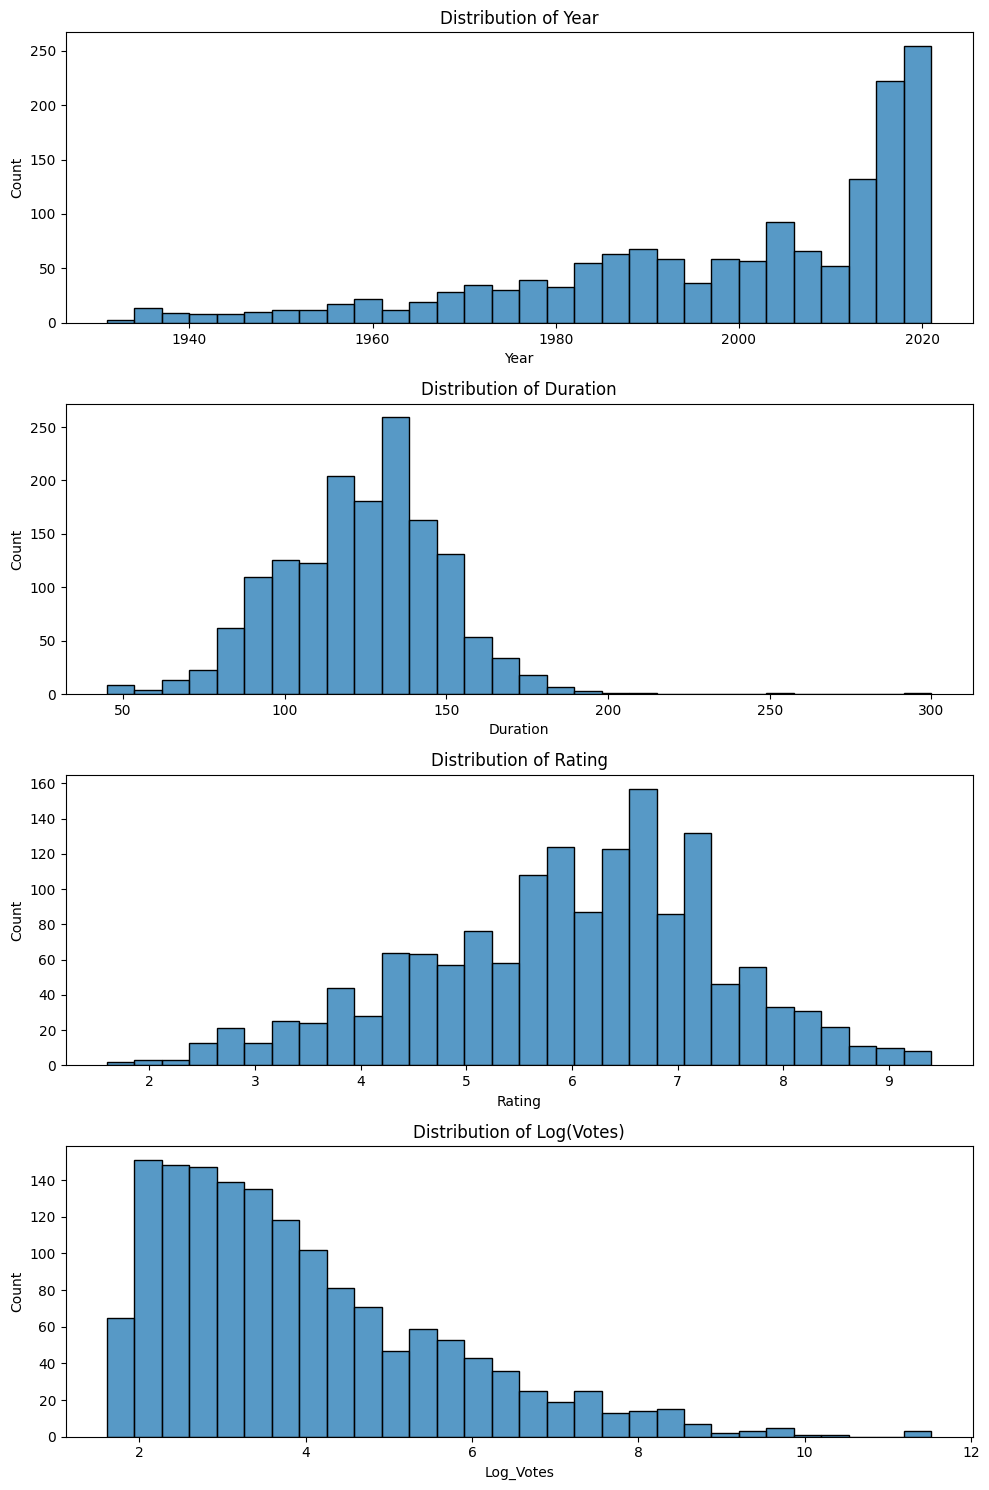

In [36]:
df['Log_Votes'] = np.log(df['Votes'])
# Distribution of datas
fig, axs = plt.subplots(4, 1, figsize=(10, 15))
sns.histplot(df['Year'], bins=30, ax=axs[0])
axs[0].set_title('Distribution of Year')

sns.histplot(df['Duration'], bins=30, ax=axs[1])
axs[1].set_title('Distribution of Duration')

sns.histplot(df['Rating'], bins=30, ax=axs[2])
axs[2].set_title('Distribution of Rating')

sns.histplot(df['Log_Votes'], bins=30, ax=axs[3])
axs[3].set_title('Distribution of Log(Votes)')

plt.tight_layout()
plt.show()


In [37]:
year_avg_rating = df.groupby('Year')['Rating'].mean().reset_index()
a=5
top_years = year_avg_rating.nlargest(a, 'Rating')
fig = px.bar(top_years, x='Year', y='Rating', title=f'Top {a} Years by Average Rating', color = "Rating", color_continuous_scale = "darkmint")
fig.update_xaxes(type='category')
fig.update_layout(xaxis_title='Year', yaxis_title='Average Rating', plot_bgcolor = 'white')
fig.show()

In [38]:
average_rating_by_year = df.groupby('Year')['Rating'].mean().reset_index()

fig = px.line(average_rating_by_year, x='Year', y='Rating', color_discrete_sequence=['#559C9E'])
fig.update_layout(title='Average rating over Years', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Year', yaxis_title='Rating', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig.show()

In [39]:

average_rating_by_year = df.groupby('Year')['Votes'].mean().reset_index()

fig = px.line(average_rating_by_year, x='Year', y='Votes', color_discrete_sequence=['#559C9E'])
fig.update_layout(title='Are there any trends in votes across year?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Year', yaxis_title='Votes', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig.show()

In [40]:
df.drop('Name', axis = 1, inplace = True)

In [41]:
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

In [42]:
X = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Rating']


In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

# RandomForestRegression Model

In [44]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [45]:
print('The performance evaluation of Random Forest Regressor is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))

The performance evaluation of Random Forest Regressor is below:  

Mean squared error:  0.12030480718954253
Mean absolute error:  0.19742810457516424
R2 score:  0.936930942106593


In [46]:
X.head()

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.420152,7.000,6.850000,7.000000,7.000
10,2004,17,96,6.420152,6.200,5.766667,5.100000,6.200
11,2016,59,120,4.698529,5.900,5.900000,5.900000,5.900
30,2005,1002,116,6.420152,6.525,6.900000,6.866667,5.700
32,1993,15,168,6.420152,5.400,5.600000,6.400000,5.825


In [47]:
y.head()

,Rating
1,7.0
10,6.2
11,5.9
30,7.1
32,5.6


In [48]:
data = {'Year': [2005], 'Votes': [1002], 'Duration': [116], 'Genre_mean_rating': [6.4], 'Director_encoded': [6.5], 'Actor1_encoded': [6.9], 'Actor2_encoded': [6.8], 'Actor3_encoded': [5.700]}
df = pd.DataFrame(data)

In [49]:
predicted_rating_lr = rf.predict(df)
print("Predicted Rating:", predicted_rating_lr[0])

Predicted Rating: 6.855000000000006


In [50]:
predicted_rating_rf = rf.predict(df)
print("Predicted Rating:", predicted_rating_rf[0])

Predicted Rating: 6.855000000000006
